# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | kiuruvesi
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | al lagowa
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | maragogi
Processing Record 9 of Set 1 | roanoke rapids
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | north bay
Processing Record 12 of Set 1 | sandpoint
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | redencao
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | sao joao da barra
Processing Record 17 of Set 1 | ain sefra
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | nema
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | iaciara
Processing Record 22 of Set 1 | leh
Processing Record 2

Processing Record 39 of Set 4 | wynyard
Processing Record 40 of Set 4 | saipan
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | pavlodar
Processing Record 43 of Set 4 | punto fijo
Processing Record 44 of Set 4 | east ballina
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | campos gerais
Processing Record 47 of Set 4 | al azraq ash shamali
City not found. Skipping...
Processing Record 48 of Set 4 | namsos
Processing Record 49 of Set 4 | kitimat
Processing Record 0 of Set 5 | gaya
Processing Record 1 of Set 5 | gwadar
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | fuyang
Processing Record 4 of Set 5 | caibarien
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | maceio
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | fort st. john
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | puerto aysen
Processing Record 11 of Set 5 | tamandare
Processing

Processing Record 28 of Set 8 | gornesti
Processing Record 29 of Set 8 | flin flon
Processing Record 30 of Set 8 | bac lieu
Processing Record 31 of Set 8 | bagua grande
Processing Record 32 of Set 8 | miyaly
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | boundiali
Processing Record 35 of Set 8 | taulaga
Processing Record 36 of Set 8 | khanty-mansiysk
Processing Record 37 of Set 8 | ruston
Processing Record 38 of Set 8 | olyokminsk
Processing Record 39 of Set 8 | bakanas
Processing Record 40 of Set 8 | trenggalek
Processing Record 41 of Set 8 | tyukhtet
Processing Record 42 of Set 8 | ebersbach an der fils
Processing Record 43 of Set 8 | dubbo
Processing Record 44 of Set 8 | irbit
Processing Record 45 of Set 8 | san fernando
Processing Record 46 of Set 8 | garissa
Processing Record 47 of Set 8 | sankheda
Processing Record 48 of Set 8 | quellon
Processing Record 49 of Set 8 | villa gesell
Processing Record 0 of Set 9 | vitoria do mearim
Processing Record 1

Processing Record 15 of Set 12 | dalandzadgad
Processing Record 16 of Set 12 | bubaque
Processing Record 17 of Set 12 | sao vicente
Processing Record 18 of Set 12 | bardai
Processing Record 19 of Set 12 | egilsstadir
Processing Record 20 of Set 12 | taoudenni
Processing Record 21 of Set 12 | bengkulu
Processing Record 22 of Set 12 | borgarnes
Processing Record 23 of Set 12 | key largo
Processing Record 24 of Set 12 | ouani
-----------------------------
Data Retrieval Complete      
-----------------------------


In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,27.06,72,16,1.00,IN,1698212850
1,kiuruvesi,63.6500,26.6167,-5.26,96,22,0.28,FI,1698212850
2,lata,40.1629,-8.3327,16.07,99,78,1.62,PT,1698212850
3,port-aux-francais,-49.3500,70.2167,4.35,89,100,13.77,TF,1698212850
4,al lagowa,11.4000,29.1333,29.16,52,77,2.14,SD,1698212850


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,27.06,72,16,1.00,IN,1698212850
1,kiuruvesi,63.6500,26.6167,-5.26,96,22,0.28,FI,1698212850
2,lata,40.1629,-8.3327,16.07,99,78,1.62,PT,1698212850
3,port-aux-francais,-49.3500,70.2167,4.35,89,100,13.77,TF,1698212850
4,al lagowa,11.4000,29.1333,29.16,52,77,2.14,SD,1698212850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

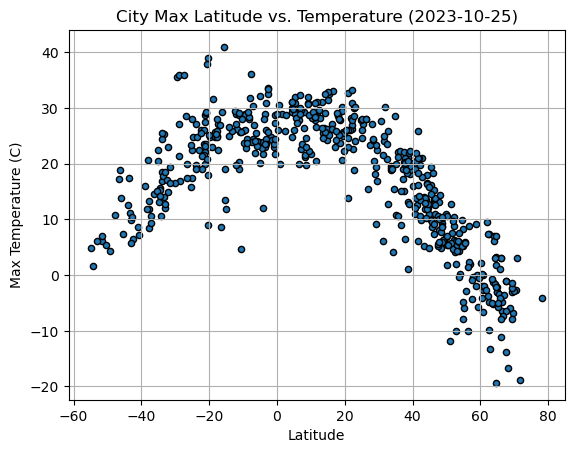

In [39]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-10-25)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

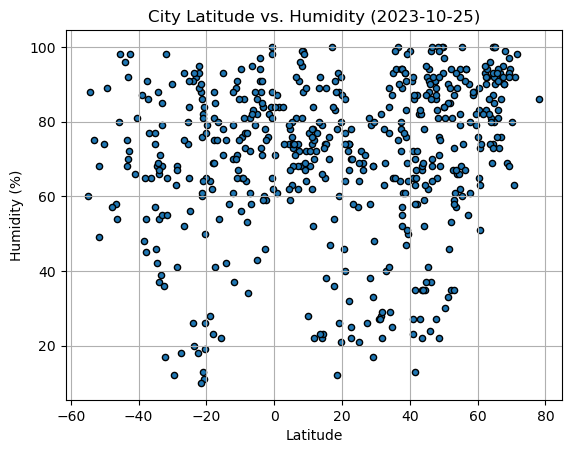

In [40]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-25)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

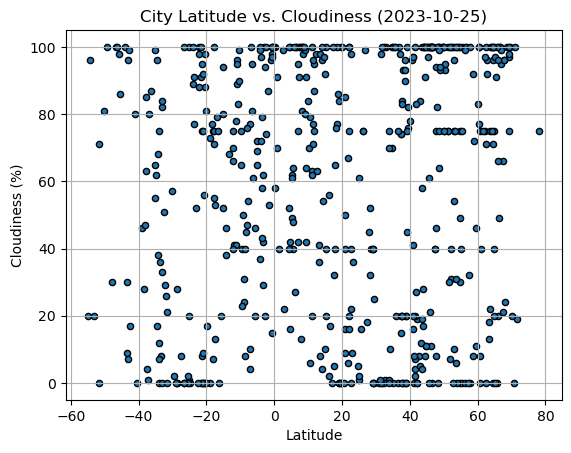

In [41]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Cloudiness", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-25)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

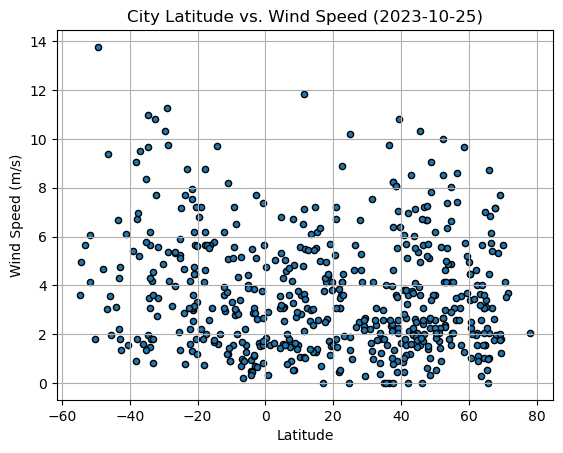

In [42]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Wind Speed", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-10-25)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values, eq_plot_x, eq_plot_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_plot_x,eq_plot_y),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue**2}")


In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,27.06,72,16,1.00,IN,1698212850
1,kiuruvesi,63.6500,26.6167,-5.26,96,22,0.28,FI,1698212850
2,lata,40.1629,-8.3327,16.07,99,78,1.62,PT,1698212850
4,al lagowa,11.4000,29.1333,29.16,52,77,2.14,SD,1698212850
5,bilibino,68.0546,166.4372,-16.64,99,24,1.96,RU,1698212850


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,4.35,89,100,13.77,TF,1698212850
7,maragogi,-9.0122,-35.2225,22.88,86,24,2.80,BR,1698212851
12,papatowai,-46.5619,169.4708,17.31,58,100,3.04,NZ,1698212851
13,redencao,-4.2258,-38.7306,21.84,97,37,0.47,BR,1698212851
15,sao joao da barra,-21.6403,-41.0511,23.50,88,91,1.31,BR,1698212852


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8018019778968851


Text(0, 0.5, 'Max Temp(C)')

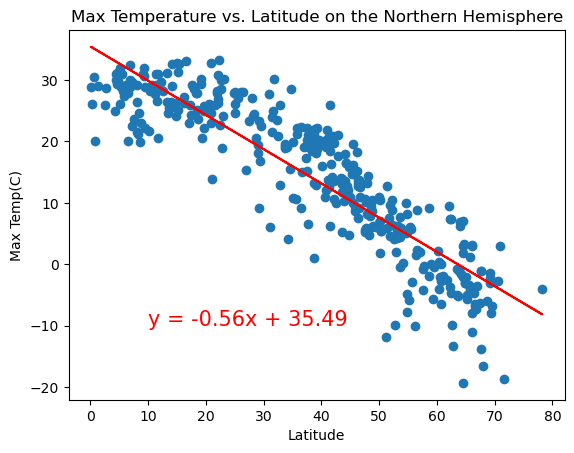

In [90]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
eq_plot_x = 10
eq_plot_y = -10

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Max Temperature vs. Latitude on the Northern Hemisphere")
plt.ylabel("Max Temp(C)")

The r-squared is: 0.43131466105022426


Text(0, 0.5, 'Max Temp(C)')

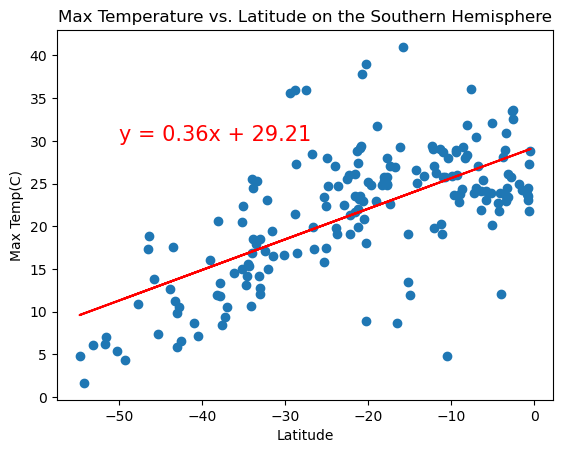

In [91]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
eq_plot_x = -50
eq_plot_y = 30

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Max Temperature vs. Latitude on the Southern Hemisphere")
plt.ylabel("Max Temp(C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04736146356895923


Text(0, 0.5, 'Humidity')

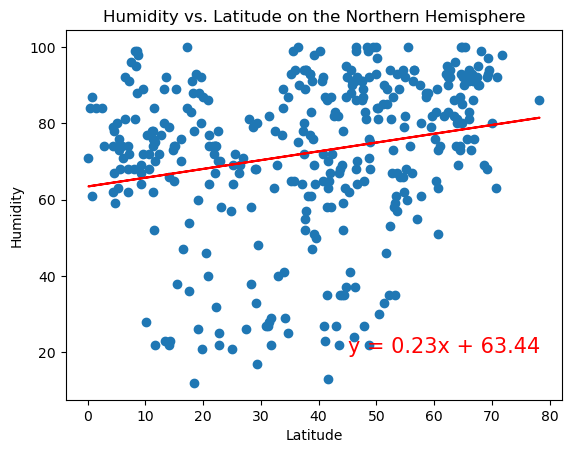

In [99]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
eq_plot_x = 45
eq_plot_y = 20

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Humidity vs. Latitude on the Northern Hemisphere")
plt.ylabel("Humidity (%)")

The r-squared is: 0.012735315351224031


Text(0, 0.5, 'Humidity')

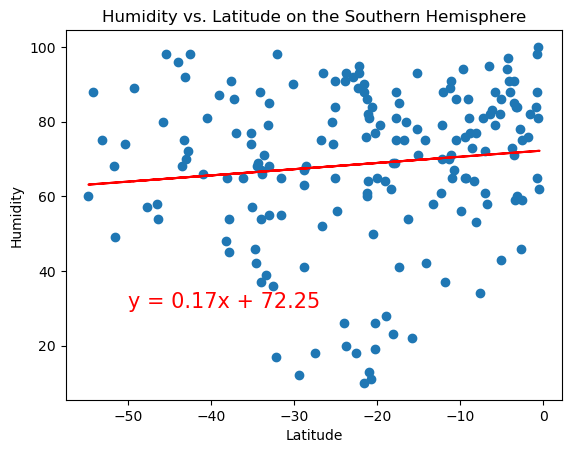

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
eq_plot_x = -50
eq_plot_y = 30

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Humidity vs. Latitude on the Southern Hemisphere")
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002307713610012216


Text(0, 0.5, 'Cloudiness')

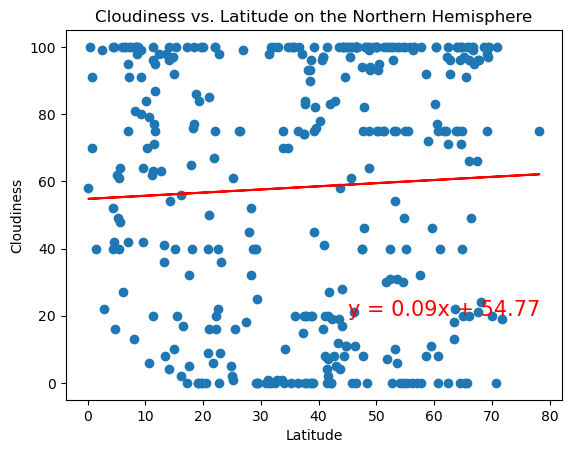

In [102]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
eq_plot_x = 45
eq_plot_y = 20

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Cloudiness vs. Latitude on the Northern Hemisphere")
plt.ylabel("Cloudiness (%)")

The r-squared is: 0.02919777067798002


Text(0, 0.5, 'Cloudiness')

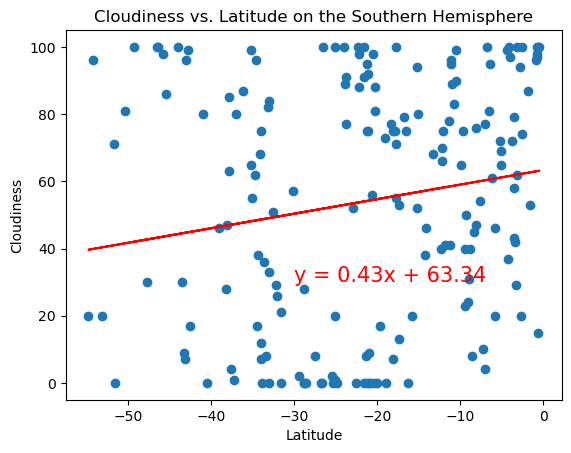

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
eq_plot_x = -30
eq_plot_y = 30

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Cloudiness vs. Latitude on the Southern Hemisphere")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002626739181136663


Text(0, 0.5, 'Wind Speed (m/s)')

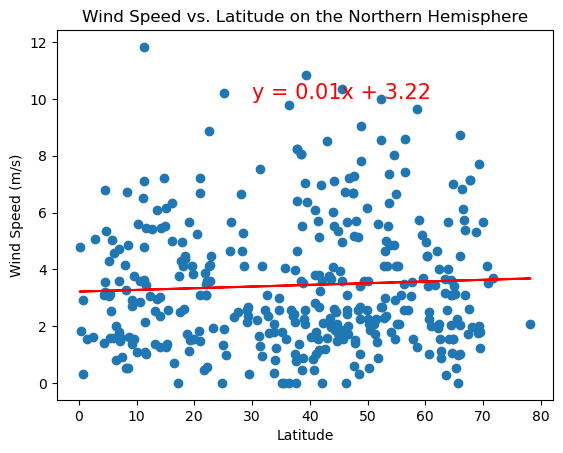

In [108]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
eq_plot_x = 30
eq_plot_y = 10

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Wind Speed vs. Latitude on the Northern Hemisphere")
plt.ylabel("Wind Speed (m/s)")

The r-squared is: 0.08547419299724676


Text(0, 0.5, 'Wind Speed (m/s)')

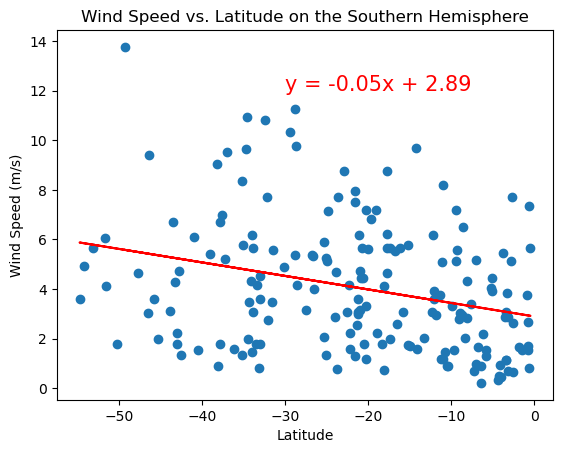

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
eq_plot_x = -30
eq_plot_y = 12

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Wind Speed vs. Latitude on the Southern Hemisphere")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE